<a href="https://colab.research.google.com/github/Duhita-7/DataConsumption_PredictionModel/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import Data Manipulation Librareis
import pandas as pd
import numpy as np

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Improt Filter Wrning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging
import logging
logging.basicConfig(level=logging.INFO,
                    filename='model.log',
                    filemode= 'w',
                    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
                    force= True)

In [7]:
# Data Ingestion
df = pd.read_csv(r'/content/Titanic_Dataset.csv')
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeGroup,CabinDeck,Ticket,Survived
0,1,3,male,43.2,4,3,23.01,S,8,0,Miss,Adult,Unknown,PC 27225,0
1,2,3,male,21.4,2,0,157.46,C,3,0,Mr,YoungAdult,Unknown,SC 257787,1
2,3,3,female,47.2,1,4,131.88,S,6,0,Mr,Adult,Unknown,CA 147316,1
3,4,1,male,15.7,0,4,3.42,S,5,0,Dr,Teen,Unknown,PC 710570,0
4,5,1,male,49.6,2,0,54.24,S,3,0,Miss,Adult,Unknown,PC 620176,0


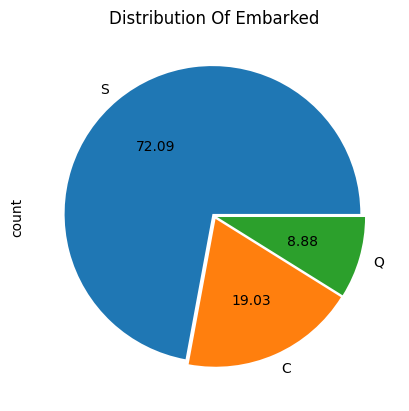

In [9]:
df["Embarked"].value_counts().plot(kind="pie",
                                   autopct = '%0.2f',
                                   explode = [0.02,0.02,0.02])
plt.title("Distribution Of Embarked")
plt.show()


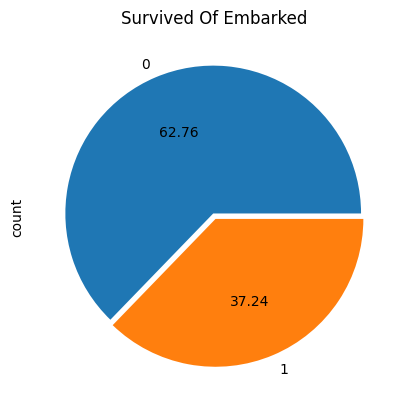

In [16]:
df["Survived"].value_counts().plot(kind="pie",
                                   autopct = '%0.2f',
                                   explode = [0.02,0.02])
plt.title("Survived Of Embarked")
plt.show()

In [23]:
# Dataset for Southhamption: S
southhamton_data = df[(df["Embarked"] == 's')]

# People who borded therir journy from southhamton 's' and who is survived in i.e.1
southhamton_data = df[(df["Embarked"] == 's') & (df["Survived"] == 1)]

# People who borded therir journy from southhamton 's' and who is survived in i.e.0
NotSurvived_Data_Southhampton = df[(df["Embarked"] == 's') & (df["Survived"] == 0)]




In [24]:
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeGroup,CabinDeck,Ticket,Survived
0,1,3,male,43.2,4,3,23.01,S,8,0,Miss,Adult,Unknown,PC 27225,0
1,2,3,male,21.4,2,0,157.46,C,3,0,Mr,YoungAdult,Unknown,SC 257787,1
2,3,3,female,47.2,1,4,131.88,S,6,0,Mr,Adult,Unknown,CA 147316,1
3,4,1,male,15.7,0,4,3.42,S,5,0,Dr,Teen,Unknown,PC 710570,0
4,5,1,male,49.6,2,0,54.24,S,3,0,Miss,Adult,Unknown,PC 620176,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,3,male,17.3,5,3,4.02,C,9,0,Mr,Teen,Unknown,SC 377738,1
14996,14997,3,male,22.6,5,3,102.12,S,9,0,Master,YoungAdult,F,STON/O2. 546072,0
14997,14998,1,male,23.0,0,2,109.40,S,3,0,Dr,YoungAdult,Unknown,W./C. 16490,0
14998,14999,2,male,18.7,1,0,44.37,S,2,0,Mr,YoungAdult,D,W./C. 70916,1


In [32]:
df.drop(columns = ['PassengerId','CabinDeck','Ticket','Title','AgeGroup'], axis = 1, inplace = True)

In [ ]:
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeGroup,CabinDeck,Ticket,Survived
0,1,3,male,43.2,4,3,23.01,S,8,0,Miss,Adult,Unknown,PC 27225,0
1,2,3,male,21.4,2,0,157.46,C,3,0,Mr,YoungAdult,Unknown,SC 257787,1
2,3,3,female,47.2,1,4,131.88,S,6,0,Mr,Adult,Unknown,CA 147316,1
3,4,1,male,15.7,0,4,3.42,S,5,0,Dr,Teen,Unknown,PC 710570,0
4,5,1,male,49.6,2,0,54.24,S,3,0,Miss,Adult,Unknown,PC 620176,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,3,male,17.3,5,3,4.02,C,9,0,Mr,Teen,Unknown,SC 377738,1
14996,14997,3,male,22.6,5,3,102.12,S,9,0,Master,YoungAdult,F,STON/O2. 546072,0
14997,14998,1,male,23.0,0,2,109.40,S,3,0,Dr,YoungAdult,Unknown,W./C. 16490,0
14998,14999,2,male,18.7,1,0,44.37,S,2,0,Mr,YoungAdult,D,W./C. 70916,1


In [41]:
from pandas.core.arrays import categorical
'''
Step1 : split data into a and y
Step2 : use train test split
Step3 : use Encoding technique
Step4 : use scaling techniques
'''

x = df.drop(columns='Survived', axis=1)
y = df["Survived"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,RobustScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTE
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.3,
                                                 random_state=1)


# segregate data into categorical and numerical columns
numerical_col = x_train.select_dtypes(exclude='object').columns
categorical_col = x_train.select_dtypes(include='object').columns

# use lable encoder

for i in categorical_col:
  le = LabelEncoder()
  x_train[i] = le.fit_transform(x_train[i])
  x_test[i] = le.transform(x_test[i])

#Use scaling techniques

scaler = MinMaxScaler()
x_train[numerical_col] = scaler.fit_transform(x_train[numerical_col])
x_test[numerical_col] = scaler.transform(x_test[numerical_col])

scaler = RobustScaler()
x_train[numerical_col] = scaler.fit_transform(x_train[numerical_col])
x_test[numerical_col] = scaler.transform(x_test[numerical_col])

# SMOTE

sm = SMOTE()
x_train,y_train = sm.fit_resample(x_train,y_train)  # for seen data


In [42]:
y_train.value_counts()

,count
Survived,
0,6538
1,6538


0.4855555555555556


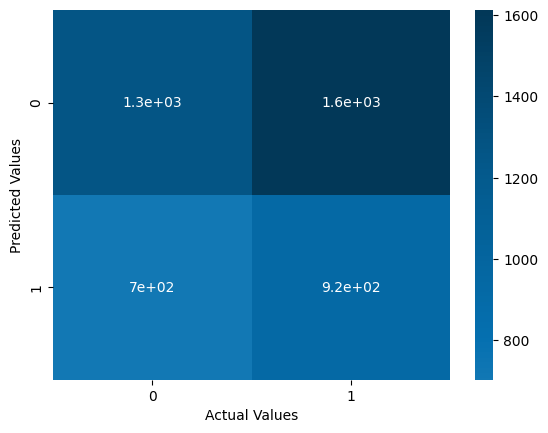

              precision    recall  f1-score   support

           0       0.64      0.44      0.52      2876
           1       0.36      0.57      0.44      1624

    accuracy                           0.49      4500
   macro avg       0.50      0.50      0.48      4500
weighted avg       0.54      0.49      0.49      4500



In [44]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

lr = LogisticRegression().fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

acc_lr = accuracy_score(y_test,y_pred_lr)
print(acc_lr)

cm_lr = confusion_matrix(y_test,y_pred_lr)

sns.heatmap(cm_lr,annot = True,center = 0,cmap = "PuBu")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

print(classification_report(y_test,y_pred_lr))

0.5488888888888889


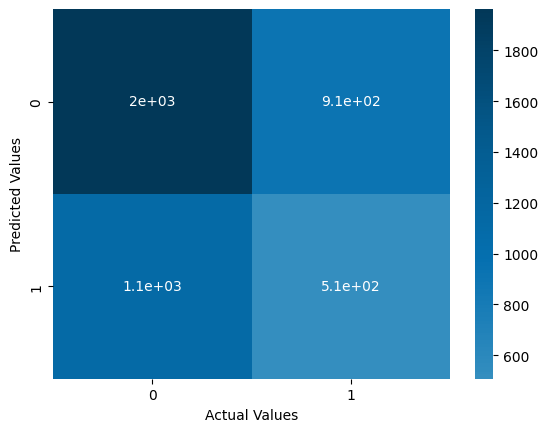

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      2876
           1       0.36      0.31      0.33      1624

    accuracy                           0.55      4500
   macro avg       0.50      0.50      0.50      4500
weighted avg       0.54      0.55      0.54      4500



In [46]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


rf = RandomForestClassifier().fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

acc_rf = accuracy_score(y_test,y_pred_rf)
print(acc_rf)

cm_rf = confusion_matrix(y_test,y_pred_rf)

sns.heatmap(cm_rf,annot = True,center = 0,cmap = "PuBu")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

print(classification_report(y_test,y_pred_rf))



In [48]:
class_report = classification_report(y_test,y_pred_rf,)
print(class_report)

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      2876
           1       0.36      0.31      0.33      1624

    accuracy                           0.55      4500
   macro avg       0.50      0.50      0.50      4500
weighted avg       0.54      0.55      0.54      4500

